In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Collection
df = pd.read_csv('./Datasets/MSFT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1.shape

(8857,)

In [6]:
df1.head()

0    0.097222
1    0.100694
2    0.102431
3    0.099826
4    0.098090
Name: Close, dtype: float64

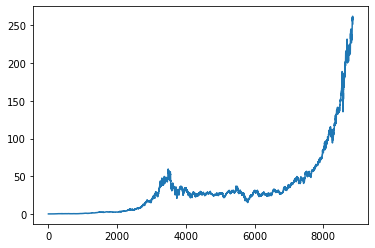

In [9]:
plt.plot(df1)

In [12]:
#LSTM is sensitive to the sca;e of the data. Thus we can use MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(8857, 1)

In [16]:
df1

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       ...,
       [9.63876521e-01],
       [9.62616393e-01],
       [9.61394489e-01]])

In [18]:
#Splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data=df1[0:training_size,:]
test_data=df1[training_size:len(df1),:1]

In [26]:
print("Training Data size = ", training_size)
print("Test Data size = ", test_size)
#print(len(train_data))
#print(len(test_data))

Training Data size =  5757
Test Data size =  3100


In [27]:
train_data

array([[2.65159923e-05],
       [3.97739884e-05],
       [4.64067989e-05],
       ...,
       [7.80118529e-02],
       [7.89283033e-02],
       [7.41551197e-02]])

In [28]:
test_data

array([[0.07648444],
       [0.07419331],
       [0.07400237],
       ...,
       [0.96387652],
       [0.96261639],
       [0.96139449]])

In [39]:
#Convert an array of values into a dataset Matrix

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
#Reshape into X=t, t+1, t+2....
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape)
print(X_train)

(5656, 100)
[[2.65159923e-05 3.97739884e-05 4.64067989e-05 ... 3.31449904e-05
  2.98304913e-05 2.98304913e-05]
 [3.97739884e-05 4.64067989e-05 3.64594894e-05 ... 2.98304913e-05
  2.98304913e-05 2.65159923e-05]
 [4.64067989e-05 3.64594894e-05 2.98304913e-05 ... 2.98304913e-05
  2.65159923e-05 2.32014933e-05]
 ...
 [1.06192726e-01 1.07032811e-01 1.06230912e-01 ... 7.20549146e-02
  7.35059665e-02 7.38878226e-02]
 [1.07032811e-01 1.06230912e-01 1.06230912e-01 ... 7.35059665e-02
  7.38878226e-02 7.72863270e-02]
 [1.06230912e-01 1.06230912e-01 1.05849056e-01 ... 7.38878226e-02
  7.72863270e-02 7.80118529e-02]]


In [43]:
print(X_test.shape)
print(X_test)

(2999, 100)
[[0.07648444 0.07419331 0.07400237 ... 0.07942471 0.08137217 0.08137217]
 [0.07419331 0.07400237 0.07533887 ... 0.08137217 0.08137217 0.08263229]
 [0.07400237 0.07533887 0.07255133 ... 0.08137217 0.08263229 0.08301415]
 ...
 [0.82205569 0.81774077 0.81819898 ... 0.99686876 0.99839616 1.        ]
 [0.81774077 0.81819898 0.81793165 ... 0.99839616 1.         0.97170455]
 [0.81819898 0.81793165 0.82449956 ... 1.         0.97170455 0.96387652]]


In [44]:
print(y_train.shape)
print(y_train)

(5656,)
[2.65159923e-05 2.32014933e-05 1.98869942e-05 ... 7.72863270e-02
 7.80118529e-02 7.89283033e-02]


In [46]:
print(y_test.shape)
print(y_test)

(2999,)
[0.08263229 0.08301415 0.08419789 ... 0.97170455 0.96387652 0.96261639]


In [86]:
#Reshape the input into 3-Dimention as it will be taken as input for LSTM Model

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
#Create Stack LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
89/89 [==============================] - 23s 162ms/step - loss: 8.7375e-04 - val_loss: 0.0014
Epoch 2/100
89/89 [==============================] - 13s 141ms/step - loss: 3.1620e-05 - val_loss: 0.0022
Epoch 3/100
89/89 [==============================] - 12s 139ms/step - loss: 3.0816e-05 - val_loss: 0.0020
Epoch 4/100
89/89 [==============================] - 12s 139ms/step - loss: 3.2522e-05 - val_loss: 0.0019
Epoch 5/100
89/89 [==============================] - 13s 142ms/step - loss: 2.4350e-05 - val_loss: 0.0025
Epoch 6/100
89/89 [==============================] - 12s 139ms/step - loss: 2.5938e-05 - val_loss: 0.0020
Epoch 7/100
89/89 [==============================] - 13s 142ms/step - loss: 2.0331e-05 - val_loss: 0.0016
Epoch 8/100
89/89 [==============================] - 12s 140ms/step - loss: 1.9538e-05 - val_loss: 0.0026
Epoch 9/100
89/89 [==============================] - 12s 138ms/step - loss: 2.3881e-05 - val_loss: 0.0018
Epoch 10/100
89/89 [==========================

In [105]:
# Lets do the prediction and check the performance matrix

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
# Transform the data into original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
# Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

21.917532134485093

In [57]:
# Test Data RSME
math.sqrt(mean_squared_error(y_test, test_predict))

89.14800693241602

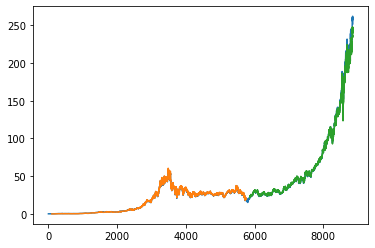

In [63]:
# Plotting

#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

#shift test prediction for plotting 

testPredictPlot=np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df1)-1, :]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [106]:
from sklearn.metrics import r2_score
r2_score( y_train , train_predict)

0.9985492888310743

In [107]:
from sklearn.metrics import r2_score
r2_score( y_test , test_predict)

0.9937657721503342

# DataFrame.csv

In [65]:
# Data Collection
df2 = pd.read_csv('./Datasets/DataFrame.csv')

In [66]:
df2.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [68]:
df3=df2.reset_index()['close']

In [69]:
df3.shape

(22805,)

In [70]:
df3.head()

0    14013.15
1    14009.05
2    14012.70
3    14016.20
4    14015.45
Name: close, dtype: float64

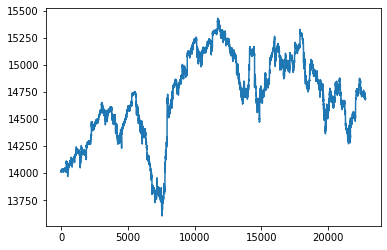

In [72]:
plt.plot(df3)

In [73]:
#LSTM is sensitive to the sca;e of the data. Thus we can use MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [74]:
df3.shape

(22805, 1)

In [75]:
df3

array([[0.22455401],
       [0.22231039],
       [0.22430776],
       ...,
       [0.59565503],
       [0.59661267],
       [0.59532669]])

In [77]:
#Splitting dataset into train and test split
training_size1=int(len(df3)*0.65)
test_size1=len(df3)-training_size
train_data1=df3[0:training_size,:]
test_data1=df3[training_size:len(df3),:1]

In [78]:
print("Training Data size = ", training_size1)
print("Test Data size = ", test_size1)
#print(len(train_data))
#print(len(test_data))

Training Data size =  14823
Test Data size =  7982


In [80]:
train_data1

array([[0.22455401],
       [0.22231039],
       [0.22430776],
       ...,
       [0.5821112 ],
       [0.58287731],
       [0.58755609]])

In [81]:
test_data1

array([[0.59042902],
       [0.58917041],
       [0.59204334],
       ...,
       [0.59565503],
       [0.59661267],
       [0.59532669]])

In [82]:
#Convert an array of values into a dataset Matrix

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [88]:
#Reshape into X=t, t+1, t+2....
time_step = 100
X_train, y_train = create_dataset(train_data1, time_step)
X_test, y_test = create_dataset(test_data1, time_step)

In [89]:
print(X_train.shape)
print(X_train)

(14722, 100)
[[0.22455401 0.22231039 0.22430776 ... 0.23465032 0.23470505 0.23399365]
 [0.22231039 0.22430776 0.22622305 ... 0.23470505 0.23399365 0.23470505]
 [0.22430776 0.22622305 0.22581263 ... 0.23399365 0.23470505 0.23407574]
 ...
 [0.55365547 0.55584437 0.5457207  ... 0.5787184  0.58241217 0.58446427]
 [0.55584437 0.5457207  0.5488946  ... 0.58241217 0.58446427 0.58331509]
 [0.5457207  0.5488946  0.54935975 ... 0.58446427 0.58331509 0.5821112 ]]


In [90]:
print(X_test.shape)
print(X_test)

(7881, 100)
[[0.59042902 0.58917041 0.59204334 ... 0.62230491 0.62183977 0.6210463 ]
 [0.58917041 0.59204334 0.58752873 ... 0.62183977 0.6210463  0.61929517]
 [0.59204334 0.58752873 0.5890336  ... 0.6210463  0.61929517 0.62255117]
 ...
 [0.60928095 0.60974609 0.60728357 ... 0.59371238 0.59365766 0.59527197]
 [0.60974609 0.60728357 0.60840538 ... 0.59365766 0.59527197 0.59456058]
 [0.60728357 0.60840538 0.60985553 ... 0.59527197 0.59456058 0.59565503]]


In [91]:
print(y_train.shape)
print(y_train)

(14722,)
[0.23470505 0.23407574 0.23506074 ... 0.58331509 0.5821112  0.58287731]


In [92]:
print(y_test.shape)
print(y_test)

(7881,)
[0.61929517 0.62255117 0.61866586 ... 0.59456058 0.59565503 0.59661267]


In [93]:
#Reshape the input into 3-Dimention as it will be taken as input for LSTM Model

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [94]:
#Create Stack LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [95]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
231/231 [==============================] - 62s 211ms/step - loss: 0.0301 - val_loss: 2.2259e-04
Epoch 2/100
231/231 [==============================] - 38s 164ms/step - loss: 1.9144e-04 - val_loss: 2.2170e-04
Epoch 3/100
231/231 [==============================] - 35s 153ms/step - loss: 1.8274e-04 - val_loss: 2.1780e-04
Epoch 4/100
231/231 [==============================] - 35s 153ms/step - loss: 1.9655e-04 - val_loss: 2.0846e-04
Epoch 5/100
231/231 [==============================] - 35s 152ms/step - loss: 1.7582e-04 - val_loss: 5.2833e-04
Epoch 6/100
231/231 [==============================] - 42s 180ms/step - loss: 1.9680e-04 - val_loss: 3.5830e-04
Epoch 7/100
231/231 [==============================] - 37s 158ms/step - loss: 1.6608e-04 - val_loss: 3.6092e-04
Epoch 8/100
231/231 [==============================] - 38s 163ms/step - loss: 1.6682e-04 - val_loss: 8.6692e-04
Epoch 9/100
231/231 [==============================] - 36s 157ms/step - loss: 1.8681e-04 - val_loss: 1.5226e

In [98]:
# Lets do the prediction and check the performance matrix

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [99]:
# Transform the data into original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [100]:
# Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

14654.163455804508

In [101]:
# Test Data RSME
math.sqrt(mean_squared_error(y_test, test_predict))

14858.374144822863

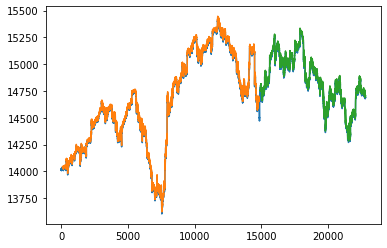

In [103]:
# Plotting

#Shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

#shift test prediction for plotting 

testPredictPlot=np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1: len(df3)-1, :]=test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()